**SPACESHIP TITANIC**

**PUC MVP ENGENHARIA DE SOFTARE**

GILMAR NEVES



---



**INITIAL SETTINGS AND IMPORTS**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import pathlib

In [2]:
filepath = './train.csv'
df = pd.read_csv(filepath)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
print("Categorical Variables")
categorical_variables = df.select_dtypes(include=['object']).columns
for col in categorical_variables:
    print(col)

Categorical Variables
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [4]:
print("Numerical Variables")
numerical_variables = df._get_numeric_data().columns
for col in numerical_variables:
    print(col)

Numerical Variables
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


In [5]:
df.dtypes

,0
PassengerId,object
HomePlanet,object
CryoSleep,object
Cabin,object
Destination,object
Age,float64
VIP,object
RoomService,float64
FoodCourt,float64
ShoppingMall,float64


In [6]:
def get_nulls(df):
    dict_nulls = {}
    for col in  df.columns:
        dict_nulls[col]=df[col].isnull().sum()

    df_nulls = pd.DataFrame(data=list(dict_nulls.values()),
                            index=list(dict_nulls.keys()),
                            columns=['#nulls'])
    return df_nulls

get_nulls(df)

,#nulls
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [7]:
def get_nulls_percentage(df):
    dict_nulls = {}
    for col in  df.columns:
        percentage_null_values = str(round(df[col].isnull().sum()/len(df),2))+\
        "%"
        dict_nulls[col] = percentage_null_values

    df_nulls = pd.DataFrame(data=list(dict_nulls.values()),
                            index=list(dict_nulls.keys()),
                            columns=['% nulls'])
    return df_nulls

get_nulls_percentage(df)

,% nulls
PassengerId,0.0%
HomePlanet,0.02%
CryoSleep,0.02%
Cabin,0.02%
Destination,0.02%
Age,0.02%
VIP,0.02%
RoomService,0.02%
FoodCourt,0.02%
ShoppingMall,0.02%


In [8]:
for cat_col in categorical_variables:
    if cat_col!="Name":
        df[cat_col] = df[cat_col].fillna(df[cat_col].mode()[0])

In [9]:
for num_col in numerical_variables:
    df[num_col] = df[num_col].fillna(df[num_col].mean())

In [10]:
get_nulls_percentage(df)

,% nulls
PassengerId,0.0%
HomePlanet,0.0%
CryoSleep,0.0%
Cabin,0.0%
Destination,0.0%
Age,0.0%
VIP,0.0%
RoomService,0.0%
FoodCourt,0.0%
ShoppingMall,0.0%


In [11]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [12]:
df.describe(include=['O'])

,PassengerId,HomePlanet,Cabin,Destination,Name
count,8693,8693,8693,8693,8493
unique,8693,3,6560,3,8473
top,0001_01,Earth,G/734/S,TRAPPIST-1e,Gollux Reedall
freq,1,4803,207,6097,2


In [13]:
# Dropping the name column we don't need anymore
df.drop(['Name'], axis=1, inplace=True)

In [14]:
categorical_variables = df.select_dtypes(include=['object']).columns

In [15]:
categorical_variables

Index(['PassengerId', 'HomePlanet', 'Cabin', 'Destination'], dtype='object')

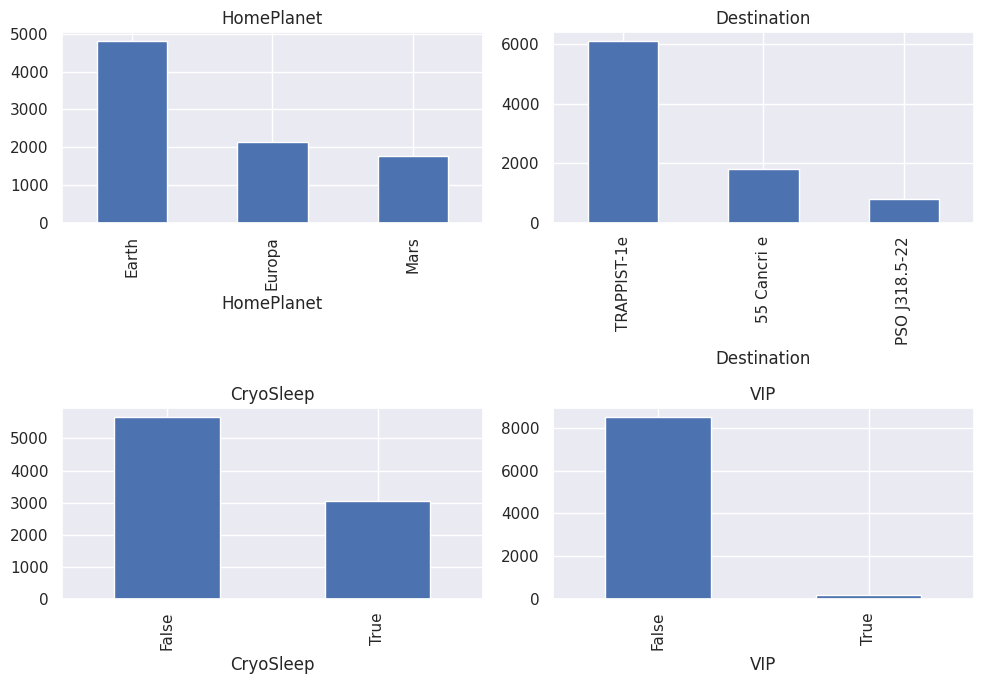

In [16]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
df['HomePlanet'].value_counts().plot(kind='bar', title='HomePlanet')
plt.subplot(2,2,2)
df['Destination'].value_counts().plot(kind='bar', title='Destination')
plt.subplot(2,2,3)
df['CryoSleep'].value_counts().plot(kind='bar', title='CryoSleep')
plt.subplot(2,2,4)
df['VIP'].value_counts().plot(kind='bar',title='VIP')
plt.tight_layout();

In [17]:
df['VIP'].value_counts()

,count
VIP,
False,8494
True,199


In [18]:
numerical_variables = list(numerical_variables)
if "train" in filepath:
    numerical_variables.remove('Transported')

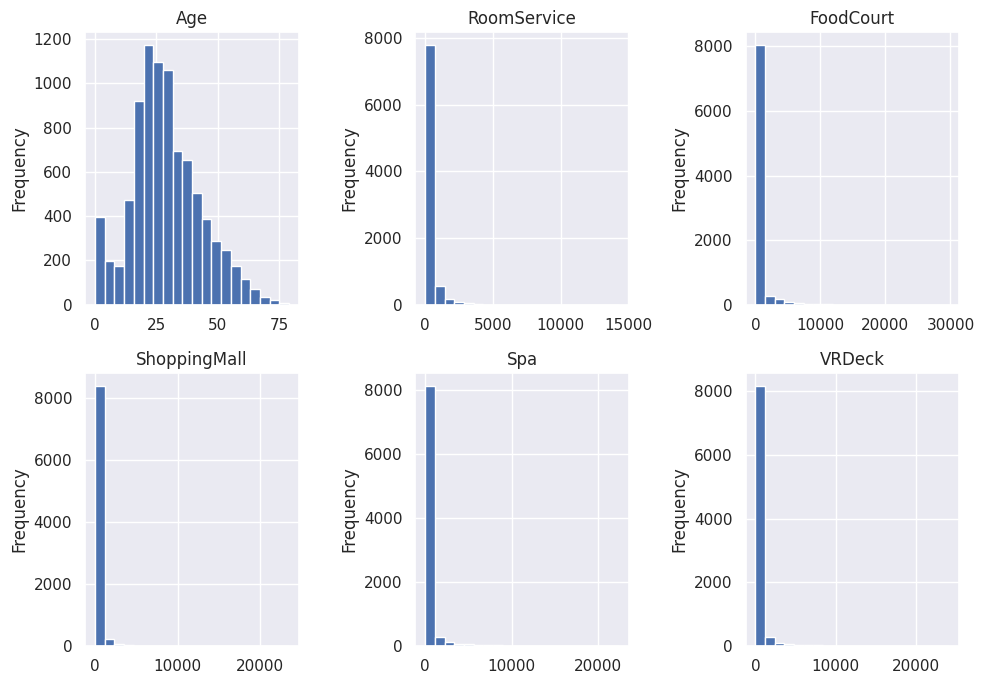

In [19]:
plt.figure(figsize=(10,7))
for i,num_col in enumerate(numerical_variables):
    plt.subplot(2,3,i+1)
    df[num_col].plot(kind='hist', bins=20)
    plt.title(num_col)
plt.tight_layout();

In [20]:
# building the deck and port features from the 'cabin' column
df['Deck'] = df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df['Port'] = df['Cabin'].apply(lambda s: s[-1] if pd.notnull(s) else 'M')
df["Deck"] = df["Deck"].map({'B':0, 'F':1, 'A':2, 'G':3, 'E':4, 'D':5, 'C':6, 'T':7}).astype(int)
df["Port"] = df["Port"].map({'P':0, 'S':1}).astype(int)
df.drop(['Cabin'], axis=1, inplace=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,1


In [21]:
df["HomePlanet"] = df["HomePlanet"].map({'Earth':0, 'Europa':1, 'Mars':2}).astype(int)
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,1,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0002_01,0,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,1
2,0003_01,1,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,0003_02,1,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0004_01,0,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,1


In [22]:
unique_destinations = df["Destination"].unique()
df["Destination"] = df["Destination"].map(dict(zip(unique_destinations,list(range(len(unique_destinations)))))).astype(int)

In [23]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,1,False,0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0002_01,0,False,0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,1
2,0003_01,1,False,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,0003_02,1,False,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0004_01,0,False,0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,1


In [24]:
df["Destination"].unique()

array([0, 1, 2])

In [25]:
if 'train' in filepath:
    df.drop(['PassengerId'],axis=1, inplace=True)

In [26]:
unique_vip = df["VIP"].unique()
df["VIP"] = df["VIP"].map(dict(zip(unique_vip,list(range(len(unique_vip)))))).astype(int)

In [27]:
unique_cryosleep = df["CryoSleep"].unique()
df["CryoSleep"] = df["CryoSleep"].map(dict(zip(unique_cryosleep,list(range(len(unique_cryosleep)))))).astype(int)

In [28]:
filename =  pathlib.Path(filepath).stem + "_cleaned.csv"
file_dest_path = pathlib.Path("./") / filename
df.to_csv(file_dest_path, index=False)

In [29]:
### FIRST TRAINING

In [30]:
df_train = pd.read_csv("./train_cleaned.csv")
# 1. Train Test Split
X = df_train.drop("Transported", axis=1).values
y = df_train["Transported"].values

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape,y_train.shape, X_test.shape, y_test.shape

((6954, 12), (6954,), (1739, 12), (1739,))

In [32]:
df_train.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,1,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1,1
2,1,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,1,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,1


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [34]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_score = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_score)


KNN Accuracy: 0.765382403680276


In [35]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_score = accuracy_score(y_test, dtree_pred)
print("Decision Tree Accuracy:", dtree_score)


Decision Tree Accuracy: 0.7400805060379528


In [36]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_score = accuracy_score(y_test, nb_pred)
print("Naive Bayes Accuracy:", nb_score)


Naive Bayes Accuracy: 0.6986774008050604


In [37]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_score = accuracy_score(y_test, svc_pred)
print("SVM Accuracy:", svc_score)


SVM Accuracy: 0.7648073605520413


In [38]:
results = pd.DataFrame(dict(model=['KNN',
                              'Decision Tree',
                              'Naive Bayes',
                              'SVM'],accuracy=[knn_score, dtree_score,
                                               nb_score, svc_score]))

results

,model,accuracy
0,KNN,0.765382
1,Decision Tree,0.740081
2,Naive Bayes,0.698677
3,SVM,0.764807


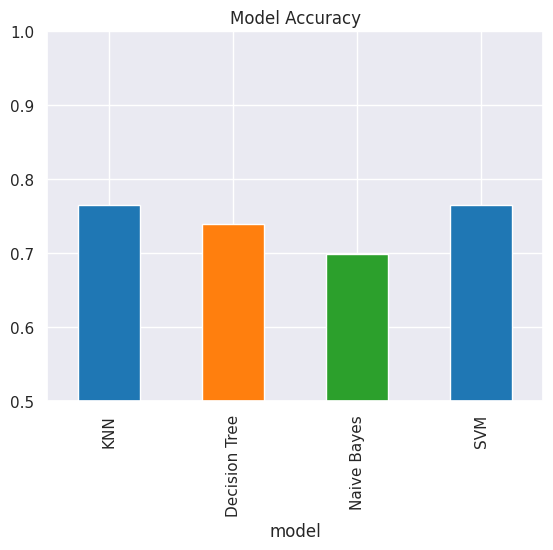

In [39]:
results.plot(kind='bar',x='model',y='accuracy',title='Model Accuracy',legend=False,
        color=['#1F77B4', '#FF7F0E', '#2CA02C'])
plt.ylim(0.5,1);

In [40]:
### Check on the correlation

In [41]:
correlation_matrix=df_train.corr()
correlation_matrix

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
HomePlanet,1.000000,0.083586,-0.034737,0.133888,0.123512,0.211527,0.071642,0.101056,0.055014,0.039575,0.115461,0.014401,0.000636
CryoSleep,0.083586,1.000000,0.096287,-0.070736,-0.078281,-0.243986,-0.205682,-0.206366,-0.198392,-0.193107,0.460132,0.036362,0.023858
Destination,-0.034737,0.096287,1.000000,0.006619,0.044707,-0.046390,0.111049,-0.024384,0.055916,0.073233,0.108152,0.038141,0.012979
Age,0.133888,-0.070736,0.006619,1.000000,0.091574,0.067612,0.127937,0.032655,0.120992,0.099210,-0.074249,0.039150,0.011758
VIP,0.123512,-0.078281,0.044707,0.091574,1.000000,0.056595,0.126006,0.018483,0.060573,0.123092,-0.037261,0.033100,-0.008798
RoomService,0.211527,-0.243986,-0.046390,0.067612,0.056595,1.000000,-0.015521,0.052962,0.009925,-0.019207,-0.242048,0.028671,-0.007503
FoodCourt,0.071642,-0.205682,0.111049,0.127937,0.126006,-0.015521,1.000000,-0.013934,0.220587,0.224275,0.046074,0.107337,0.019602
ShoppingMall,0.101056,-0.206366,-0.024384,0.032655,0.018483,0.052962,-0.013934,1.000000,0.013678,-0.007189,0.010019,-0.013031,-0.021922
Spa,0.055014,-0.198392,0.055916,0.120992,0.060573,0.009925,0.220587,0.013678,1.000000,0.147957,-0.218791,0.073223,0.005739
VRDeck,0.039575,-0.193107,0.073233,0.099210,0.123092,-0.019207,0.224275,-0.007189,0.147957,1.000000,-0.204825,0.077588,-0.008975


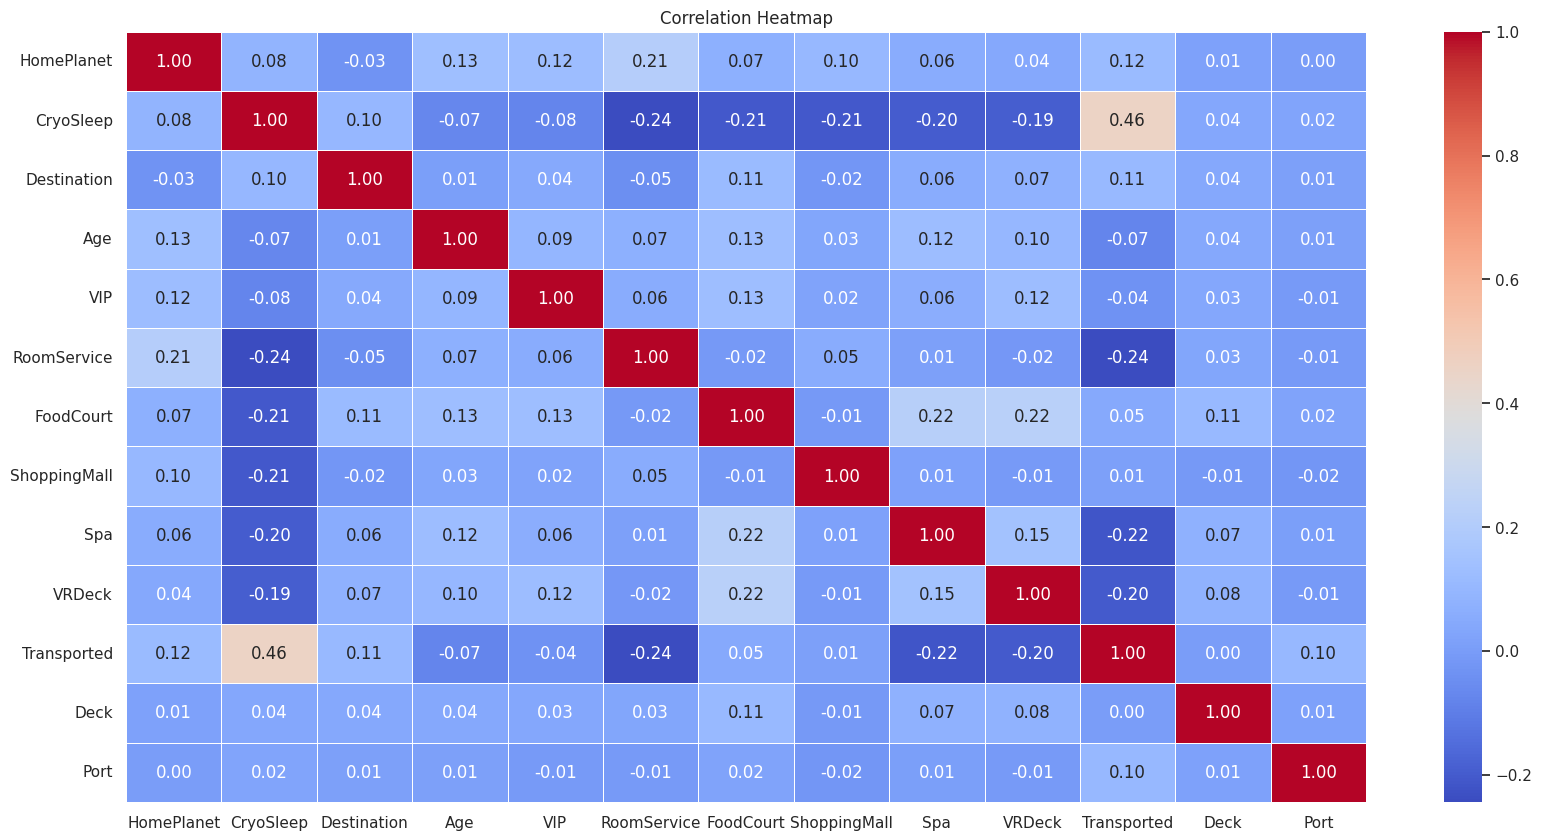

In [42]:
# Create the correlation heatmap with two decimal places in annotations
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()